In [1]:
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# for Dimensionality reduction
from sklearn.decomposition import PCA

#for Models development 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

#for validation
from sklearn.model_selection import cross_val_score,KFold


#for model Evaluation 
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,matthews_corrcoef

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv('Ov_fullprots.csv')
data

,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,6282,CAA31690.1,1,R,NaN,NaN,0,0,NaN,RTTTMKIL,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,6282,CAA31690.1,2,T,NaN,NaN,0,0,NaN,RTTTMKILF,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,6282,CAA31690.1,3,T,NaN,NaN,0,0,NaN,RTTTMKILFC,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,6282,CAA31690.1,4,T,NaN,NaN,0,0,NaN,RTTTMKILFCL,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,6282,CAA31690.1,5,M,NaN,NaN,0,0,NaN,RTTTMKILFCLL,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,6282,AAB96970.1,648,T,NaN,NaN,0,0,NaN,EEKLIVSTKKQS,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,6282,AAB96970.1,649,K,NaN,NaN,0,0,NaN,EKLIVSTKKQS,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,6282,AAB96970.1,650,K,NaN,NaN,0,0,NaN,KLIVSTKKQS,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,6282,AAB96970.1,651,Q,NaN,NaN,0,0,NaN,LIVSTKKQS,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [3]:
#Check for missing values 

data.isnull().sum().sort_values(ascending=False)

Class               28528
Info_epitope_id     28528
Info_host_id        28528
Info_type           28528
feat_KF6                0
                    ...  
feat_VHSE8              0
feat_ProtFP1            0
feat_ProtFP2            0
feat_ProtFP3            0
Info_organism_id        0
Length: 94, dtype: int64

In [4]:
# checking missing percentages 

missing_percentages = data.isnull().sum().sort_values(ascending=False) / len(data)
missing_percentages

Class               0.410646
Info_epitope_id     0.410646
Info_host_id        0.410646
Info_type           0.410646
feat_KF6            0.000000
                      ...   
feat_VHSE8          0.000000
feat_ProtFP1        0.000000
feat_ProtFP2        0.000000
feat_ProtFP3        0.000000
Info_organism_id    0.000000
Length: 94, dtype: float64

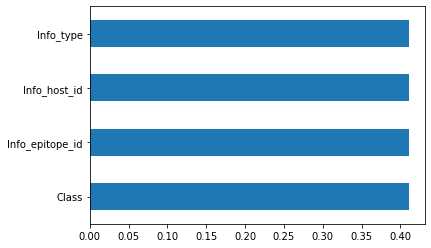

In [5]:
# visualization of null values 
missing_percentages[missing_percentages !=0].plot(kind='barh')

# making a copy of original data frame

In [4]:
df_master=data.copy()
df_master

,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,6282,CAA31690.1,1,R,NaN,NaN,0,0,NaN,RTTTMKIL,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,6282,CAA31690.1,2,T,NaN,NaN,0,0,NaN,RTTTMKILF,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,6282,CAA31690.1,3,T,NaN,NaN,0,0,NaN,RTTTMKILFC,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,6282,CAA31690.1,4,T,NaN,NaN,0,0,NaN,RTTTMKILFCL,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,6282,CAA31690.1,5,M,NaN,NaN,0,0,NaN,RTTTMKILFCLL,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,6282,AAB96970.1,648,T,NaN,NaN,0,0,NaN,EEKLIVSTKKQS,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,6282,AAB96970.1,649,K,NaN,NaN,0,0,NaN,EKLIVSTKKQS,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,6282,AAB96970.1,650,K,NaN,NaN,0,0,NaN,KLIVSTKKQS,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,6282,AAB96970.1,651,Q,NaN,NaN,0,0,NaN,LIVSTKKQS,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


# Removing  the irrelevant features from the dataset.

In [5]:
# data=data.drop("Info_organism_id", axis=1)
# data=data.drop("Info_epitope_id", axis=1)
# data=data.drop("Info_host_id", axis=1)
# data=data.drop("Info_nPos", axis=1)
# data=data.drop("Info_nNeg", axis=1)
# data=data.drop("Info_type", axis=1)
# data=data.drop("Info_window", axis=1)

# #Trying out Info_protein_id
# #data=data.drop("Info_protein_id", axis=1)


Remove_info_cols = []
for i in df_master.columns:
    if 'Info_' in i:
        Remove_info_cols.append(i)
for i in Remove_info_cols:
    df_master = df_master.drop(i,axis=1)


In [6]:
df_master

,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,NaN,2.405639,41,92,12,19,1,1089.30,0.375000,0.375000,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,NaN,2.641604,50,103,13,21,1,1254.49,0.333333,0.333333,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,NaN,2.846439,53,110,14,23,2,1375.65,0.400000,0.400000,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,NaN,2.845351,59,123,15,25,2,1506.82,0.363636,0.363636,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,NaN,2.792481,65,136,16,27,2,1637.99,0.333333,0.333333,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,NaN,2.855389,60,130,16,32,0,1587.77,0.250000,0.333333,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,NaN,2.845351,55,121,15,28,0,1440.64,0.272727,0.363636,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,NaN,2.646439,50,112,14,24,0,1293.51,0.300000,0.400000,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,NaN,2.725481,44,98,12,22,0,1147.32,0.333333,0.444444,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [7]:
#Check for missing values after removing Info_ features

df_master.isnull().sum().sort_values(ascending=False)

Class           28528
feat_KF1            0
feat_KF3            0
feat_KF4            0
feat_KF5            0
                ...  
feat_ProtFP3        0
feat_ProtFP4        0
feat_ProtFP5        0
feat_ProtFP6        0
feat_T1             0
Length: 83, dtype: int64

In [10]:
df_master['Class'].unique()

array([nan,  1., -1.])

# Selecting target feature

In [8]:
x=df_master.drop(['Class'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=df_master['Class']

In [12]:
y.ndim

1

In [13]:
y = np.array(y).reshape(1, -1)

In [14]:
y.ndim

2

# impute missing values (using Scikit-Learn KNN-Imputer)

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(y)

array([[1., 1., 1., ..., 1., 1., 1.]])

In [18]:
type(y)

numpy.ndarray

In [19]:
# df_master=df_master.merge(y, how='left')
# df_master


In [20]:
#Check for missing values after imputing with KNN

df_master.isnull().sum().sort_values(ascending=False)

Class           28528
feat_KF1            0
feat_KF3            0
feat_KF4            0
feat_KF5            0
                ...  
feat_ProtFP3        0
feat_ProtFP4        0
feat_ProtFP5        0
feat_ProtFP6        0
feat_T1             0
Length: 83, dtype: int64

# Class distribution


In [11]:
class_count = y.value_counts()
class_count

 1.0    28722
-1.0    12221
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x117a8a09088>,
 [Text(-0.6507832691638026, 0.8868377171593876, '1.0'),
  Text(0.6507832691638028, -0.8868377171593874, '-1.0')],
 [Text(-0.354972692271165, 0.48372966390512045, '70.15'),
  Text(0.3549726922711651, -0.48372966390512034, '29.85')])

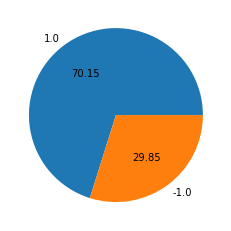

In [12]:
#Class distribution visualization approch 2 using matplotlib library 
import matplotlib.pyplot as plt
fig1, ax1 =plt.subplots()
ax1.pie(y.value_counts(),autopct='%.2f', labels=class_count.index) # %.2f give us the values in 2 digits

In [13]:
data['Info_protein_id'].describe()

count          69471
unique           182
top       A0A044UK00
freq           12628
Name: Info_protein_id, dtype: object

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69471 entries, 0 to 69470
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   feat_seq_entropy       69471 non-null  float64
 1   feat_C_atoms           69471 non-null  int64  
 2   feat_H_atoms           69471 non-null  int64  
 3   feat_N_atoms           69471 non-null  int64  
 4   feat_O_atoms           69471 non-null  int64  
 5   feat_S_atoms           69471 non-null  int64  
 6   feat_molecular_weight  69471 non-null  float64
 7   feat_Perc_Tiny         69471 non-null  float64
 8   feat_Perc_Small        69471 non-null  float64
 9   feat_Perc_Aliphatic    69471 non-null  float64
 10  feat_Perc_Aromatic     69471 non-null  float64
 11  feat_Perc_NonPolar     69471 non-null  float64
 12  feat_Perc_Polar        69471 non-null  float64
 13  feat_Perc_Charged      69471 non-null  float64
 14  feat_Perc_Basic        69471 non-null  float64
 15  fe

# Scalling


In [9]:
scaler= StandardScaler()
x_std =scaler.fit_transform(x)

In [10]:
x_std

array([[-1.9124869 , -3.88645427, -3.86806327, ..., -1.93921074,
         1.89479541,  0.87517252],
       [-1.24141284, -2.82196085, -3.08470566, ..., -0.96925811,
         2.01019471,  0.79359643],
       [-0.65887089, -2.46712971, -2.58620536, ..., -1.10309377,
         1.73939103,  0.77302506],
       ...,
       [-1.22766182, -2.82196085, -2.44377671, ..., -1.96163533,
         1.17931981,  0.79217771],
       [-1.0028722 , -3.53162313, -3.4407773 , ..., -2.02997695,
         1.51098592,  0.19773628],
       [-1.64412867, -4.24128541, -4.36656357, ..., -1.93120196,
         1.43319825,  0.061185  ]])

# Principal Component Analysis (PCA)

In [11]:
pca=PCA(n_components=0.99)
pca.fit_transform(x_std)

array([[ 0.19941941, -4.24127382,  2.89928626, ..., -0.52775293,
         1.89023205, -0.26428287],
       [-1.03992054, -5.95769391,  2.15884262, ..., -0.20970988,
         2.04537134, -0.70136554],
       [-0.12589948, -5.75375982,  2.20525433, ..., -0.38578711,
         1.69655615, -0.17713359],
       ...,
       [-0.08973965, -1.36432786,  3.58233113, ..., -0.32829653,
        -0.45140131,  0.57619308],
       [ 2.16035986, -1.58050041,  2.00524865, ..., -0.59583906,
        -0.51437287,  0.32983282],
       [ 2.22780151,  0.48608835,  2.67354221, ..., -0.01525873,
        -0.48464514,  0.46028595]])

In [12]:
pca.explained_variance_ratio_ 

array([0.25336686, 0.16698537, 0.11991346, 0.09505377, 0.07258156,
       0.07087405, 0.03932637, 0.0288707 , 0.0261038 , 0.022878  ,
       0.02097862, 0.01676594, 0.01482333, 0.01108403, 0.00869422,
       0.0085369 , 0.00666456, 0.00535641, 0.0046083 ])

In [16]:
# Following wil tell, how many components we got, which is bascially given data columns(features)
PCA_df=pca.n_components_
PCA_df

19

In [31]:
PCA_df=pd.DataFrame([PCA_df])
#df = pd.Dataframe([data])

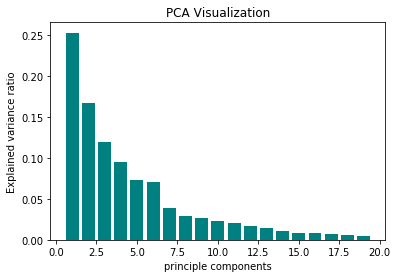

In [14]:
#Visualization of explained variance ratio

%matplotlib inline
plt.bar(range(1,20), pca.explained_variance_ratio_, color='teal')
plt.title("PCA Visualization")
plt.xlabel('principle components')
plt.ylabel('Explained variance ratio')
plt.show()

Here PCA has selcted 19 features . All these  features are computed column. They are the new feature, so that now we can use this features for further pre-processing. Next use train-test split once again, but this time I wll supply new DataFrame(pca)

# feature engineering in series-based data with Tsfresh

To install tsfresh package first we need to install conda package on conda-forge using --> conda install -c conda-forge tsfresh

In [11]:
!pip install tsfresh

In [18]:
df_tfresh=df_master.copy()
df_tfresh

,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,NaN,2.405639,41,92,12,19,1,1089.30,0.375000,0.375000,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,NaN,2.641604,50,103,13,21,1,1254.49,0.333333,0.333333,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,NaN,2.846439,53,110,14,23,2,1375.65,0.400000,0.400000,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,NaN,2.845351,59,123,15,25,2,1506.82,0.363636,0.363636,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,NaN,2.792481,65,136,16,27,2,1637.99,0.333333,0.333333,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,NaN,2.855389,60,130,16,32,0,1587.77,0.250000,0.333333,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,NaN,2.845351,55,121,15,28,0,1440.64,0.272727,0.363636,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,NaN,2.646439,50,112,14,24,0,1293.51,0.300000,0.400000,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,NaN,2.725481,44,98,12,22,0,1147.32,0.333333,0.444444,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [19]:
x=df_tfresh.drop(['Class'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=df_tfresh['Class']

In [20]:
# y = np.array(y).reshape(1, -1)

In [21]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(y)

In [11]:
#Check for missing values 

df_tfresh.isnull().sum().sort_values(ascending=False)

Class              28528
feat_MSWHIM3           0
feat_KF8               0
feat_PP3               0
feat_KF1               0
                   ...  
feat_ProtFP2           0
feat_ProtFP3           0
feat_ProtFP4           0
feat_ProtFP5           0
Info_protein_id        0
Length: 87, dtype: int64

In [12]:
# scaler= StandardScaler()
# x_TsFresh =scaler.fit_transform(x)

In [22]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [25]:
settings = ComprehensiveFCParameters()

In [23]:
from tsfresh.feature_extraction import extract_features

In [32]:
extract_features(PCA_df, default_fc_parameters=settings)

ValueError: A value for column_id needs to be supplied